In [321]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns


from sklearn.linear_model import LogisticRegression


from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import DiscriminationThreshold

from IPython.display import HTML

take the data that has been checked

In [322]:
sus_df = pd.read_csv(f"{os.getcwd()}/data/old/to_check/data_check_in_progress.csv",
                     index_col=0,
                     encoding="latin-1")

In [323]:
conf_df = pd.read_csv(f"{os.getcwd()}/data/old/conf_check/to_check-in_progress.csv",
                     index_col=0,
                     encoding="latin-1")

chaange column names to match

In [324]:
conf_df.rename(columns={"comments":"notes",
                        "file_name":"filename"}, inplace=True)

In [325]:
conf_df

,conf,conf_quart,filename,OK?,notes,label,value,year,unit
266,96,2,00757019_2018-11-15,y,NaN,tangible assets,20186,2018,Â£
267,95,2,00757019_2018-11-15,y,NaN,tangible assets,12841,2017,Â£
268,96,2,00757019_2018-11-15,y,NaN,stocks,1196489,2018,Â£
269,96,2,00757019_2018-11-15,y,NaN,stocks,594500,2017,Â£
270,96,2,00757019_2018-11-15,y,NaN,debtors,293986,2018,Â£
271,96,2,00757019_2018-11-15,y,NaN,debtors,166895,2017,Â£
272,96,2,00757019_2018-11-15,y,NaN,cash at bank and in hand,1795,2018,Â£
273,96,2,00757019_2018-11-15,y,NaN,cash at bank and in hand,99276,2017,Â£
274,96,2,00757019_2018-11-15,y,NaN,creditors amounts falling due within one year,1461658,2018,Â£
275,83,2,00757019_2018-11-15,y,NaN,creditors amounts falling due within one year,767353,2017,Â£


In [326]:
df = pd.concat([sus_df, conf_df])

/home/edd/.local/share/virtualenvs/explore-1I3eoxiK/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [327]:
df

,OK?,all_reasons,conf,conf_quart,filename,label,notes,unit,value,year
20,y,value is year?,93,NaN,00645015_2019-01-03,called up share capital,NaN,£,2002,2018
21,y,value is year?,96,NaN,00645015_2019-01-03,called up share capital,NaN,£,2002,2017
6,y,value is year?,95,NaN,00645015_2019-01-03,cash at bank and in hand,NaN,£,166665,2018
7,y,value is year?,96,NaN,00645015_2019-01-03,cash at bank and in hand,NaN,£,98022,2017
14,y,value is year?,96,NaN,00645015_2019-01-03,creditors amounts falling due after more than ...,NaN,£,695701,2018
15,y,value is year?,96,NaN,00645015_2019-01-03,creditors amounts falling due after more than ...,NaN,£,843126,2017
8,y,value is year?,96,NaN,00645015_2019-01-03,creditors amounts falling due within one year,NaN,£,225565,2018
9,y,value is year?,96,NaN,00645015_2019-01-03,creditors amounts falling due within one year,NaN,£,73966,2017
4,y,value is year?,96,NaN,00645015_2019-01-03,debtors,NaN,£,375921,2018
5,y,value is year?,96,NaN,00645015_2019-01-03,debtors,NaN,£,274518,2017


there might be duplicates so we drop them based on filename and label

In [328]:
df.shape

(2892, 10)

In [329]:
df.drop_duplicates(subset=["filename", "label","year","OK?"], keep="first").shape

(2688, 10)

Individual value confidence

Here we look at the data we have and see if confidence is a good predictor of whether or not the data is correct or not.

Lets create a dummy variable for OK? called correct

In [330]:
df["OK?"]  = df["OK?"].str.replace(" ", "")

In [331]:
df.dropna(subset=["OK?"],inplace=True)

In [332]:
df["correct"] = pd.get_dummies(df["OK?"])["y"]

some values we can explain and they are not to do with misreads, we only want misreads

(these aren't super consistent, my fault!)

In [333]:
df.notes.unique().tolist()

[nan,
 'total assets less current liabilites \x96 across two lines',
 'note should be year',
 'notes is year',
 'should be year',
 'picked up incorrect figure \x96 should be 2007 - unit is incorrect \x96 should be £',
 'picked up incorrect figure \x96 should be 1090, unit is incorrect \x96 should be £',
 'handwritten year and little information',
 'file missing assets',
 'shoud be: 291,346 confused by comma',
 'shoud be: 366,491 confused by comma',
 'year as value',
 'should be debtors \x96 and cash at back as seperate',
 'unclear where numbers are coming from',
 'missing text should be total assets less current liabilites and net assets',
 'incorrect text \x96 no il',
 'incorrect value should be 705035',
 'incorrect value \x96 should be -',
 'incorrect value \x96 should be 6038442',
 'is year',
 'incorrect value \x96 should be 2438330',
 'date/year -should not be included',
 'should not be included',
 'should be cash not gash',
 'value incorrect \x96 should be 1243834',
 'mistaken dat

In [360]:
drop_reasons = ["notes is year",
                "note is year",
                "notes as year",
                "notes should be year",
                "note should be year",
                "notes is unit",
                "note is unit",
                "not clear where this has come from",
                "not clear where this is from",
                "note clear where this has come from",
                "unclear where numbers are coming from",
                "not a value",
                "should not be included",
                "is not value",
                "incorrect year",
                "incorrect date", 
                "year incorrect",
                "date incorrect",
                "not clear on date",
                "handwritten year",
                "should be two values",
                "should be three values",
                "is two values",
                "as seperate",
                "across two lines"
                "is year",
                "is date",
                "year as value",
                "mistaken date",
                "should be year",
                "unit incorrect",
                                 "units incorrect",
                                 "units should be",
                
                ]

In [353]:
drop_mask=[not(note in drop_reasons) for note in df.notes.to_list()]

In [354]:
drop_mask

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Tr

we drop these, e.g. they are not incorrect, but we don't call them correct because we don't want to bias the resutls. therefore the model is distiguishing between things that are definietly right vs things that are definitly wrong

model

we fit and evaluate on one set as we are not testing predicitive power here but explanatory power.

In [355]:
log_mdl = LogisticRegression()

In [356]:
y = df[drop_mask].correct.values
X = df[drop_mask].conf.values.reshape(-1,1)

In [357]:
log_mdl.fit(X,y)

/home/edd/.local/share/virtualenvs/explore-1I3eoxiK/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [358]:
results = log_mdl.predict_proba(X)

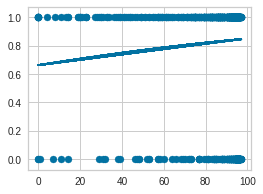

In [359]:
plot.figure(1, figsize=(4, 3))
plot.clf()

plot.scatter(X,y)
plot.plot(X,results[:,1])

so these results are like *really* bad. we can't rely on conf as an indicator for detecting errors.

It might be good at indicating if documents have errors. thought, so we try that

In [343]:
file_errors_df = pd.DataFrame(df[drop_mask].groupby("filename").correct.sum()/df[drop_mask].groupby("filename").correct.count())

In [361]:
any_errors_df = pd.DataFrame(df[drop_mask].groupby("filename").correct.all().astype(int))
any_errors_df.columns = ["all_values_correct"]

In [362]:
mean_conf_df = pd.DataFrame(df[drop_mask].groupby("filename").conf.mean())

mean_conf_df.columns = ["mean_conf"]

In [363]:
min_conf_df = pd.DataFrame(df[drop_mask].groupby("filename").conf.min())

min_conf_df.columns = ["min_conf"]

In [364]:
median_conf_df = pd.DataFrame(df[drop_mask].groupby("filename").conf.median())

median_conf_df.columns = ["median_conf"]

In [365]:
tmp_df = pd.merge(file_errors_df, mean_conf_df, left_index=True, right_index=True)
tmp_df = pd.merge(tmp_df, min_conf_df, left_index=True, right_index=True)
tmp_df = pd.merge(tmp_df, any_errors_df, left_index=True, right_index=True)
by_file_df = pd.merge(tmp_df, median_conf_df, left_index=True, right_index=True)

In [366]:
by_file_df.corr()

,correct,mean_conf,min_conf,all_values_correct,median_conf
correct,1.000000,0.140580,-0.096021,0.669916,0.236041
mean_conf,0.140580,1.000000,0.691739,0.114686,0.828129
min_conf,-0.096021,0.691739,1.000000,0.088044,0.291530
all_values_correct,0.669916,0.114686,0.088044,1.000000,0.101032
median_conf,0.236041,0.828129,0.291530,0.101032,1.000000


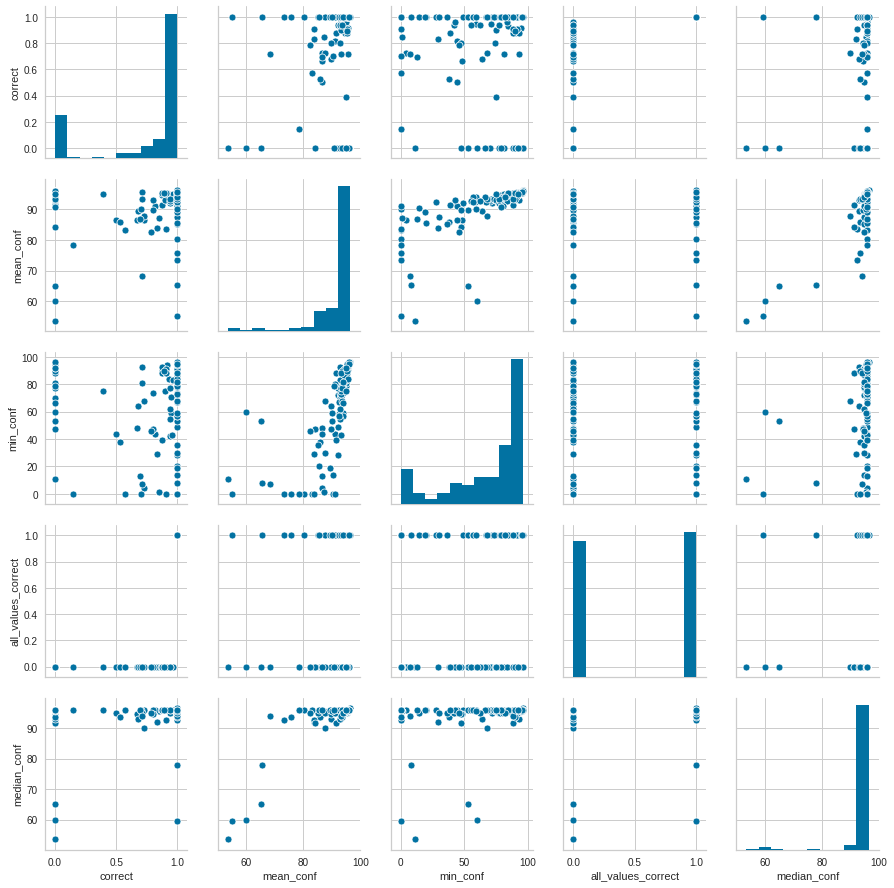

In [351]:
fig = sns.pairplot(by_file_df)

In [ ]:
fig.

I'm going to hazard a guess and say that conf isn't a good indicator of correctness here

In [107]:
model_report = ConfusionMatrix(log_mdl, 
                               classes=[1,0])

/home/edd/.local/share/virtualenvs/explore-1I3eoxiK/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


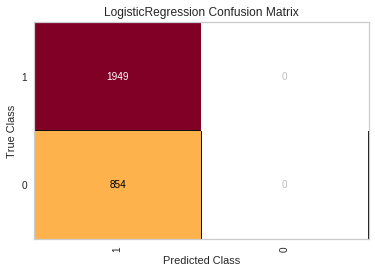

In [108]:
model_report.fit(X,y)
model_report.score(X,y)
g=model_report.poof()

error counts

In [13]:
df.shape

(2892, 10)

In [12]:
df[df["OK?"]=="y"].shape[0]

1949

In [14]:
df.columns

Index(['OK?', 'all_reasons', 'conf', 'conf_quart', 'filename', 'label',
       'notes', 'unit', 'value', 'year'],
      dtype='object')

In [25]:
errors_df = pd.DataFrame(df[df["OK?"]=="n"].groupby("notes").count().sort_values("OK?", 
                                                        ascending=False)["filename"])

In [29]:
errors_df.reset_index(inplace=True)

In [42]:
errors_df.columns = ["notes", "counts"]

In [49]:
HTML(errors_df.to_html())

,notes,counts
0,incorrect year,138
1,not clear where this has come from,112
2,notes is year,47
3,unit incorrect  should be £000,44
4,value incorrect,36
5,not a value,35
6,note is year,25
7,unit incorrect  should be EUR,24
8,incorrect date,19
9,label incorrect,18


In [115]:
errors_df.counts.sum()

834

my annotations are really inconsistent. Lets sort that

In [34]:
year_notes = ["incorrect year",
              "incorrect date", 
              "year incorrect",
              "date incorrect"]

In [310]:
error_dict = {"incorrect year" :["incorrect year",
                                 "incorrect date", 
                                 "year incorrect",
                                 "date incorrect",
                                 "not clear on date",
                                "handwritten year"],
             "is notes row" : ["notes is year",
                               "note is year",
                               "notes as year",
                               "notes should be year",
                               "note should be year",
                               "notes is unit",
                               "note is unit"
                               ],
             "value not found in doc" : ["not clear where this has come from",
                                         "not clear where this is from",
                                         "note clear where this has come from",
                                         "unclear where numbers are coming from"],
             "value incorrect" : ["value incorrect", 
                                  "incorrect value", 
                                  "incorrect figure",
                                  "note a value",
                                  "confused by comma"
                                 ],
             "label incorrect" : ["incorrect label",
                                  "incorrrect label",
                                  "label incorrect",
                                  "misspelling",
                                  "should be cash",
                                  "missing text",
                                  "incorrect text"],
             "two or more values" : ["should be two values",
                                     "should be three values",
                                     "is two values",
                                     "as seperate",
                                     "across two lines"
                                    ],
             "is not a value": ["not a value",
                               "should not be included",
                               "is not value"],
             "unit incorrect" : ["unit incorrect",
                                 "units incorrect",
                                 "units should be"],
             "value is a year or date" : ["is year",
                                          "is date",
                                          "year as value",
                                          "mistaken date",
                                          "should be year"]}

In [311]:
error_count_lst = []
for key in error_dict:
    
    error_mask = [any(error in reason for error in error_dict[key]) 
                  for reason in errors_df.notes.to_list()
                 ]
    error_count_lst.append(errors_df[error_mask].counts.sum())
    errors_df[f"{key}_error"] = error_mask

In [312]:
error_types_df = pd.DataFrame({"error": [key for key in error_dict],
                               "number" : error_count_lst}
                             ).sort_values("number", 
                                           ascending=False)

In [313]:
error_types_df

,error,number
0,incorrect year,208
8,value is a year or date,129
2,value not found in doc,128
1,is notes row,108
7,unit incorrect,108
4,label incorrect,107
3,value incorrect,89
6,is not a value,47
5,two or more values,28


In [315]:
error_types_df.number.sum()

952

In [308]:
error_cols = [column 
              for column in errors_df.columns.to_list()
              if "_error" in column
             ]

In [309]:
errors_df[~errors_df[error_cols].any(axis=1)].notes

60    handwritten year and little information
Name: notes, dtype: object

In [146]:
error_types_df.number.sum()

743

In [67]:
agg_error_df = pd.DataFrame()
for key in error_dict:
    
    error_mask = [reason in error_dict[key] 
                  for reason in errors_df.notes.to_list()]
    
    error_count = errors_df[error_mask].counts.sum()
    agg_error_df.append({"error": key, "number" : error_count}, ignore_index=True)

In [68]:
agg_error_df 

""


In [129]:
errors_df.counts.sum()

834

In [121]:
incorrect_mask = ["incorrect value" in note for note in errors_df.notes.to_list()]

In [122]:
errors_df[incorrect_mask]

,notes,counts,incorrect year_error,is notes row_error,value not found in doc_error,value incorrect_error,label incorrect_error,two or more values_error
28,"incorrect date, incorrect value",5,False,False,False,False,False,False
34,incorrect value,3,False,False,False,False,False,False
56,"Incorrect year, incorrect value  is note",2,False,False,False,False,False,False
64,"incorrect value  is note, shouold be -",2,False,False,False,False,False,False
66,"incorrect value, incorrect label",2,False,False,False,False,False,False
67,incorrect year ; incorrect value,2,False,False,False,False,False,False
98,"incorrect date, incorrect value  is note",1,False,False,False,False,False,False
107,incorrect value should be 705035,1,False,False,False,False,False,False
108,incorrect value  should be -,1,False,False,False,False,False,False
109,incorrect value  should be 1,1,False,False,False,False,False,False
